# Data Analysis

## Data Preparation + Cleaning

### Loading and Viewing Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway  
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 

warnings.filterwarnings('ignore')

In [2]:
# load in the dataset
dataset = pd.read_csv('../data/survey_responses.csv')
raw_dataset = dataset.copy()
# view the head of the dataset
dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,...,Inflation_rate_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,3rd year,Business / Economics,Yes,Less than 6 months,Trading app,Very confident,Compound interest/growth,It decreases,As risky,Higher risk generally leads to lower potential...,...,Exactly 10% interest,Slightly,Very confident,Stock performance charts,No,Sometimes,Data and analytics,Strongly disagree,Likely,Strongly agree
1,2nd year,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Not Sure,It decreases,More risky than investing in a diversified fund,Not sure,...,Exactly 10% interest,Moderately,Confident,Portfolio analytics,No,Rarely,Advice from others,Strongly agree,Neutral,Neutral
2,2nd year,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Less than 10% interest,N/A - Not an investor,Confident,Portfolio analytics,Yes,Sometimes,Personal decisions,Strongly agree,Very unlikely,Agree
3,3rd year,Business / Economics,Yes,6-12 months,Trading app,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Very confident,Other,No,Rarely,Data and analytics,Disagree,Likely,Agree
4,3rd year,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Capital (Your Investment),It decreases,Not sure,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Somewhat confident,Stock performance charts,No,Rarely,Social media trends,Agree,Likely,Neutral


In [3]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year_of_study                 1000 non-null   object
 1   Field_of_study                1000 non-null   object
 2   Ever_used_platform            1000 non-null   object
 3   Time_investing                1000 non-null   object
 4   Main_platform_type            1000 non-null   object
 5   Confidence_in_terms           1000 non-null   object
 6   Return_in_30_years            1000 non-null   object
 7   Purchasing_power_q            1000 non-null   object
 8   Single_stock_risk_q           1000 non-null   object
 9   Risk_Reward                   1000 non-null   object
 10  Inflation_time_value_q        1000 non-null   object
 11  Diversification_purpose_q     1000 non-null   object
 12  Inflation_rate_q              1000 non-null   object
 13  Knowledge_improved 

In [4]:
# dataset description + summary stats
dataset.describe()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,...,Inflation_rate_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,4,2,5,4,4,4,4,4,4,...,4,5,4,5,3,5,4,5,5,5
top,3rd year,Business / Economics,Yes,N/A - Not an investor,Trading app,Confident,Compound interest/growth,It decreases,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,N/A - Not an investor,Confident,Stock performance charts,No,Sometimes,Data and analytics,Agree,Neutral,Agree
freq,314,326,621,379,379,297,485,490,495,472,...,485,379,364,345,700,343,327,318,273,338


In [5]:
# look at unique responses to each column and the count of them
for column_name in dataset.columns:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

['3rd year' '2nd year' '1st year' 'Postgraduate']
Year_of_study
3rd year        314
2nd year        280
Postgraduate    213
1st year        193
Name: count, dtype: int64

['Business / Economics' 'Engineering/ Science' 'Other' 'Humanities / Arts']
Field_of_study
Business / Economics    326
Engineering/ Science    269
Humanities / Arts       267
Other                   138
Name: count, dtype: int64

['Yes' 'No']
Ever_used_platform
Yes    621
No     379
Name: count, dtype: int64

['Less than 6 months' '1-2 years' 'N/A - Not an investor' '6-12 months'
 'Over 2 years']
Time_investing
N/A - Not an investor    379
6-12 months              199
Less than 6 months       186
1-2 years                141
Over 2 years              95
Name: count, dtype: int64

['Trading app' 'Robo-advisor' 'N/A - Not an investor' 'Other']
Main_platform_type
Trading app              379
N/A - Not an investor    379
Robo-advisor             200
Other                     42
Name: count, dtype: int64

['Very confident'

### Clean Section 1 - Background

In [6]:
# Clean Q1
study_map = {
    '1st year': 1,
    '2nd year': 2,
    '3rd year': 3,
    'Postgraduate': 4 
}

dataset['Year_of_study'] = dataset['Year_of_study'].map(study_map)

In [7]:
dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,...,Inflation_rate_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,3,Business / Economics,Yes,Less than 6 months,Trading app,Very confident,Compound interest/growth,It decreases,As risky,Higher risk generally leads to lower potential...,...,Exactly 10% interest,Slightly,Very confident,Stock performance charts,No,Sometimes,Data and analytics,Strongly disagree,Likely,Strongly agree
1,2,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Not Sure,It decreases,More risky than investing in a diversified fund,Not sure,...,Exactly 10% interest,Moderately,Confident,Portfolio analytics,No,Rarely,Advice from others,Strongly agree,Neutral,Neutral
2,2,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Less than 10% interest,N/A - Not an investor,Confident,Portfolio analytics,Yes,Sometimes,Personal decisions,Strongly agree,Very unlikely,Agree
3,3,Business / Economics,Yes,6-12 months,Trading app,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Very confident,Other,No,Rarely,Data and analytics,Disagree,Likely,Agree
4,3,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Capital (Your Investment),It decreases,Not sure,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Somewhat confident,Stock performance charts,No,Rarely,Social media trends,Agree,Likely,Neutral


In [8]:
# Field of Study - have to one-hot encode because it is categorical with no order
dataset = pd.get_dummies(
    dataset, 
    columns=['Field_of_study'],
    prefix='Field_of_study'
)

In [9]:
dataset.head()

,Year_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,...,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps,Field_of_study_Business / Economics,Field_of_study_Engineering/ Science,Field_of_study_Humanities / Arts,Field_of_study_Other
0,3,Yes,Less than 6 months,Trading app,Very confident,Compound interest/growth,It decreases,As risky,Higher risk generally leads to lower potential...,£110 in one year,...,No,Sometimes,Data and analytics,Strongly disagree,Likely,Strongly agree,True,False,False,False
1,2,Yes,1-2 years,Robo-advisor,Confident,Not Sure,It decreases,More risky than investing in a diversified fund,Not sure,Not sure,...,No,Rarely,Advice from others,Strongly agree,Neutral,Neutral,False,True,False,False
2,2,No,N/A - Not an investor,N/A - Not an investor,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,£110 in one year,...,Yes,Sometimes,Personal decisions,Strongly agree,Very unlikely,Agree,False,True,False,False
3,3,Yes,6-12 months,Trading app,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,£110 in one year,...,No,Rarely,Data and analytics,Disagree,Likely,Agree,True,False,False,False
4,3,Yes,1-2 years,Robo-advisor,Confident,Capital (Your Investment),It decreases,Not sure,Higher risk generally leads to higher potentia...,£100 today,...,No,Rarely,Social media trends,Agree,Likely,Neutral,False,True,False,False


In [10]:
# Clean if the use a platform
use_platform_map = {
    'No': 0,
    'Yes': 1
}
dataset['Ever_used_platform'] = dataset['Ever_used_platform'].map(use_platform_map)

In [11]:
# Clean Time investing
dataset = pd.get_dummies(
    dataset, 
    columns=['Time_investing'],
    prefix='Time_investing'
)

In [12]:
# Clean main platform used
dataset = pd.get_dummies(
    dataset, 
    columns=['Main_platform_type'],
    prefix='Main_platform_type'
)

In [13]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,Diversification_purpose_q,Inflation_rate_q,...,Field_of_study_Other,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app
0,3,1,Very confident,Compound interest/growth,It decreases,As risky,Higher risk generally leads to lower potential...,£110 in one year,To reduce the overall risk of the portfolio,Exactly 10% interest,...,False,False,False,True,False,False,False,False,False,True
1,2,1,Confident,Not Sure,It decreases,More risky than investing in a diversified fund,Not sure,Not sure,To reduce the overall risk of the portfolio,Exactly 10% interest,...,False,True,False,False,False,False,False,False,True,False
2,2,0,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,£110 in one year,To reduce the overall risk of the portfolio,Less than 10% interest,...,False,False,False,False,True,False,True,False,False,False
3,3,1,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,£110 in one year,To reduce the overall risk of the portfolio,Exactly 10% interest,...,False,False,True,False,False,False,False,False,False,True
4,3,1,Confident,Capital (Your Investment),It decreases,Not sure,Higher risk generally leads to higher potentia...,£100 today,To minimize fees and expenses,Exactly 10% interest,...,False,True,False,False,False,False,False,False,True,False


### Clean Section 2 - Financial Literacy

In [14]:
# define if they got they answer correct
columns_with_correct_answers = [
    'Return_in_30_years',           
    'Purchasing_power_q',         
    'Single_stock_risk_q',         
    'Risk_Reward',                 
    'Inflation_time_value_q',       
    'Diversification_purpose_q',    
    'Inflation_rate_q'              
]

correct_answers = [
    'Compound interest/growth',                        
    'It decreases',                                      
    'More risky than investing in a diversified fund',    
    'Higher risk generally leads to higher potential reward',
    '£110 in one year',                                 
    'To reduce the overall risk of the portfolio',      
    'Exactly 10% interest'                              
]

for column, correct_answer in zip(columns_with_correct_answers, correct_answers):
    dataset[column] = (dataset[column] == correct_answer).astype(int)

# create the financial literacy score
dataset['Financial_Literacy_Score'] = dataset[columns_with_correct_answers].sum(axis=1)

# look into the cleaned columns
for column_name in columns_with_correct_answers:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

[1 0]
Return_in_30_years
0    515
1    485
Name: count, dtype: int64

[1 0]
Purchasing_power_q
0    510
1    490
Name: count, dtype: int64

[0 1]
Single_stock_risk_q
0    505
1    495
Name: count, dtype: int64

[0 1]
Risk_Reward
0    528
1    472
Name: count, dtype: int64

[1 0]
Inflation_time_value_q
0    532
1    468
Name: count, dtype: int64

[1 0]
Diversification_purpose_q
0    518
1    482
Name: count, dtype: int64

[1 0]
Inflation_rate_q
0    515
1    485
Name: count, dtype: int64



In [15]:
columns_to_label_enc = ['Confidence_in_terms',
                        'Knowledge_improved']

confidence_map = {
        'Not confident': 0,
        'Somewhat confident': 1,
        'Confident': 2,
        'Very confident': 3
    }

knowledge_map_ = {
    'N/A - Not an investor': 0,  
    'No': 1,
    'Slightly': 2,
    'Moderately': 3,
    'Significantly': 4
}

dataset['Confidence_in_terms'] = dataset['Confidence_in_terms'].map(confidence_map)
dataset['Knowledge_improved'] = dataset['Knowledge_improved'].map(knowledge_map_)

for column_name in columns_to_label_enc:
    print(dataset[column_name].unique())
    print(dataset[column_name].value_counts())
    print("")

[3 2 0 1]
Confidence_in_terms
2    297
3    283
1    276
0    144
Name: count, dtype: int64

[2 3 0 4 1]
Knowledge_improved
0    379
2    228
3    160
4    145
1     88
Name: count, dtype: int64



In [16]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,Diversification_purpose_q,Inflation_rate_q,...,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app,Financial_Literacy_Score
0,3,1,3,1,1,0,0,1,1,1,...,False,False,True,False,False,False,False,False,True,5
1,2,1,2,0,1,1,0,0,1,1,...,True,False,False,False,False,False,False,True,False,4
2,2,0,2,0,0,1,1,1,1,0,...,False,False,False,True,False,True,False,False,False,4
3,3,1,2,0,0,1,1,1,1,1,...,False,True,False,False,False,False,False,False,True,5
4,3,1,2,0,1,0,1,0,0,1,...,True,False,False,False,False,False,False,True,False,3


### Clean Section 3 - Digital Literacy

In [17]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,Diversification_purpose_q,Inflation_rate_q,...,Time_investing_1-2 years,Time_investing_6-12 months,Time_investing_Less than 6 months,Time_investing_N/A - Not an investor,Time_investing_Over 2 years,Main_platform_type_N/A - Not an investor,Main_platform_type_Other,Main_platform_type_Robo-advisor,Main_platform_type_Trading app,Financial_Literacy_Score
0,3,1,3,1,1,0,0,1,1,1,...,False,False,True,False,False,False,False,False,True,5
1,2,1,2,0,1,1,0,0,1,1,...,True,False,False,False,False,False,False,True,False,4
2,2,0,2,0,0,1,1,1,1,0,...,False,False,False,True,False,True,False,False,False,4
3,3,1,2,0,0,1,1,1,1,1,...,False,True,False,False,False,False,False,False,True,5
4,3,1,2,0,1,0,1,0,0,1,...,True,False,False,False,False,False,False,True,False,3


In [18]:
# Clean confidence in data intepretation
interpreting_data_map = {
    'Not confident': 0,
    'Somewhat confident': 1,
    'Confident': 2, 
    'Very confident': 3
}

dataset['Confidence_interpreting_data'] = dataset['Confidence_interpreting_data'].map(interpreting_data_map)

In [19]:
# Clean which features are most used

dataset = pd.get_dummies(
    dataset, 
    columns=['Features_used_most'],
    prefix='Features_used_most'
)

In [20]:
# Clean regreted decsions 

dataset = pd.get_dummies(
    dataset, 
    columns=['Regretted_misinterpretation'],
    prefix='Regretted_misinterpretation'
)


### Clean Section 4 - Investment Behaviour & Attitudes

In [21]:
dataset.head()

,Year_of_study,Ever_used_platform,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,Diversification_purpose_q,Inflation_rate_q,...,Main_platform_type_Trading app,Financial_Literacy_Score,Features_used_most_AI or data insights,Features_used_most_Market news,Features_used_most_Other,Features_used_most_Portfolio analytics,Features_used_most_Stock performance charts,Regretted_misinterpretation_No,Regretted_misinterpretation_Not sure,Regretted_misinterpretation_Yes
0,3,1,3,1,1,0,0,1,1,1,...,True,5,False,False,False,False,True,True,False,False
1,2,1,2,0,1,1,0,0,1,1,...,False,4,False,False,False,True,False,True,False,False
2,2,0,2,0,0,1,1,1,1,0,...,False,4,False,False,False,True,False,False,False,True
3,3,1,2,0,0,1,1,1,1,1,...,True,5,False,False,True,False,False,True,False,False
4,3,1,2,0,1,0,1,0,0,1,...,False,3,False,False,False,False,True,True,False,False


In [22]:
# Clean decisoins based on app data
frequency_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}
dataset['Frequency_based_on_app_data'] = dataset['Frequency_based_on_app_data'].map(frequency_map)

In [23]:
# Clean nfluenced by what?
dataset = pd.get_dummies(
    dataset, 
    columns=['Greater_influence'],
    prefix='Greater_influence'
)

In [24]:
# Clean oversimplify question
oversimplify_map = {
    'Strongly disagree': 0,
    'Disagree': 1,
    'Neutral': 2,
    'Agree': 3,
    'Strongly agree': 4
}
dataset['Apps_oversimplify'] = dataset['Apps_oversimplify'].map(oversimplify_map)


In [25]:
# clean likely to use new features
likely_map = {
    'Very unlikely': 0,
    'Unlikely': 1,
    'Neutral': 2,
    'Likely': 3,
    'Very likely': 4
}
dataset['Likely_to_use_new_features'] = dataset['Likely_to_use_new_features'].map(likely_map)


In [26]:
# Clean Q18
viz_helps_map = {
    'Strongly disagree': 0,
    'Disagree': 1,
    'Neutral': 2,
    'Agree': 3,
    'Strongly agree': 4
}
dataset['Data_viz_helps'] = dataset['Data_viz_helps'].map(viz_helps_map)


In [27]:
# Create the digital literacy score
columns_for_score = [
        'Confidence_interpreting_data',
        'Data_viz_helps',
        'Features_used_most_Portfolio analytics',
        'Features_used_most_Stock performance charts',
        'Features_used_most_AI or data insights'              
    ]

dataset['Digital_Literacy_Score'] = dataset[columns_for_score].sum(axis=1)

In [28]:
# create investment behaviour score

# creata a metric of critical thinking so low if apps do oversimplify
dataset['Critical_Oversimplify'] = 4 - dataset['Apps_oversimplify']

# Combine into Behavioural Score 
dataset['Investment_Behaviour_Score'] = (
    dataset['Frequency_based_on_app_data'] + 
    dataset['Critical_Oversimplify'] +      
    dataset['Likely_to_use_new_features'] 
)

## Data Visualisation

In [29]:
raw_dataset.head()

,Year_of_study,Field_of_study,Ever_used_platform,Time_investing,Main_platform_type,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,...,Inflation_rate_q,Knowledge_improved,Confidence_interpreting_data,Features_used_most,Regretted_misinterpretation,Frequency_based_on_app_data,Greater_influence,Apps_oversimplify,Likely_to_use_new_features,Data_viz_helps
0,3rd year,Business / Economics,Yes,Less than 6 months,Trading app,Very confident,Compound interest/growth,It decreases,As risky,Higher risk generally leads to lower potential...,...,Exactly 10% interest,Slightly,Very confident,Stock performance charts,No,Sometimes,Data and analytics,Strongly disagree,Likely,Strongly agree
1,2nd year,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Not Sure,It decreases,More risky than investing in a diversified fund,Not sure,...,Exactly 10% interest,Moderately,Confident,Portfolio analytics,No,Rarely,Advice from others,Strongly agree,Neutral,Neutral
2,2nd year,Engineering/ Science,No,N/A - Not an investor,N/A - Not an investor,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Less than 10% interest,N/A - Not an investor,Confident,Portfolio analytics,Yes,Sometimes,Personal decisions,Strongly agree,Very unlikely,Agree
3,3rd year,Business / Economics,Yes,6-12 months,Trading app,Confident,Capital (Your Investment),It stays the same,More risky than investing in a diversified fund,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Very confident,Other,No,Rarely,Data and analytics,Disagree,Likely,Agree
4,3rd year,Engineering/ Science,Yes,1-2 years,Robo-advisor,Confident,Capital (Your Investment),It decreases,Not sure,Higher risk generally leads to higher potentia...,...,Exactly 10% interest,Significantly,Somewhat confident,Stock performance charts,No,Rarely,Social media trends,Agree,Likely,Neutral


In [30]:
dataset.to_csv('../data/cleaned_regression_data.csv', index = False) # saved the clean dataset
dataset.head() # see the head of the dataset

,Year_of_study,Ever_used_platform,Confidence_in_terms,Return_in_30_years,Purchasing_power_q,Single_stock_risk_q,Risk_Reward,Inflation_time_value_q,Diversification_purpose_q,Inflation_rate_q,...,Regretted_misinterpretation_No,Regretted_misinterpretation_Not sure,Regretted_misinterpretation_Yes,Greater_influence_Advice from others,Greater_influence_Data and analytics,Greater_influence_Personal decisions,Greater_influence_Social media trends,Digital_Literacy_Score,Critical_Oversimplify,Investment_Behaviour_Score
0,3,1,3,1,1,0,0,1,1,1,...,True,False,False,False,True,False,False,8,4,9
1,2,1,2,0,1,1,0,0,1,1,...,True,False,False,True,False,False,False,5,0,3
2,2,0,2,0,0,1,1,1,1,0,...,False,False,True,False,False,True,False,6,0,2
3,3,1,2,0,0,1,1,1,1,1,...,True,False,False,False,True,False,False,6,3,7
4,3,1,2,0,1,0,1,0,0,1,...,True,False,False,False,False,False,True,4,1,5


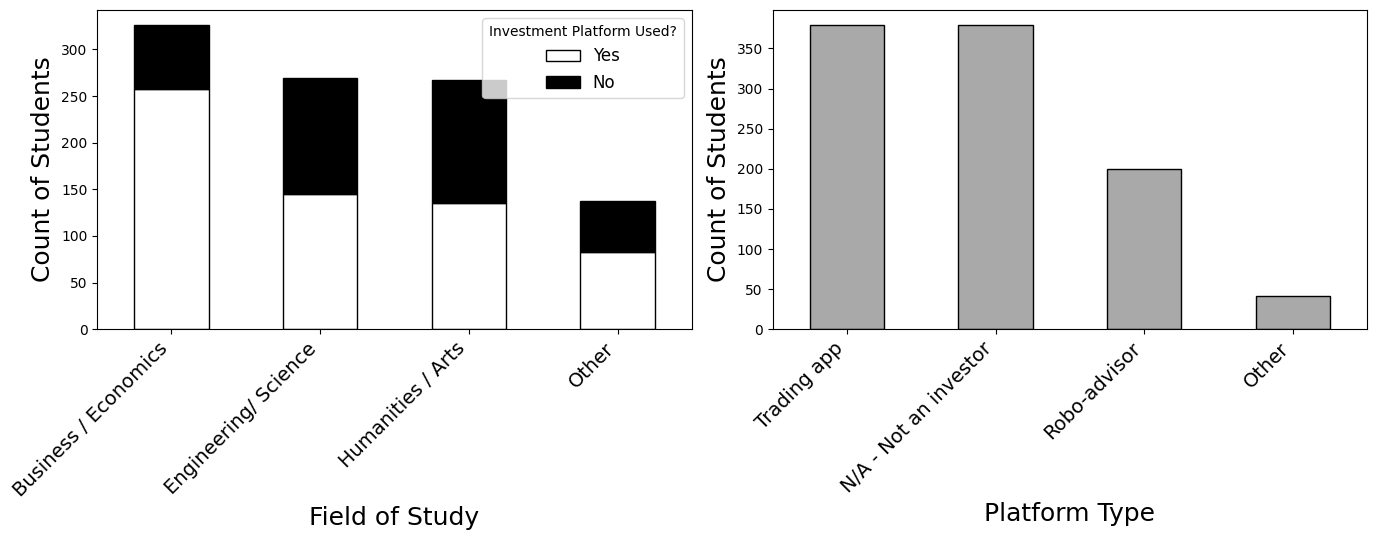

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))

# Field of Study vs. Platform Usage

# Reorder the columns
cross_tab = pd.crosstab(raw_dataset['Field_of_study'], raw_dataset['Ever_used_platform'])

if 'Yes' in cross_tab.columns and 'No' in cross_tab.columns:
    cross_tab = cross_tab[['Yes', 'No']]

cross_tab.plot(kind='bar', stacked=True, colormap='Greys', edgecolor='black', ax=ax[0]) # create the stacked bar plot

# Set Axis Settings and Labels
ax[0].set_xlabel('Field of Study', fontsize=18)  # add x label
ax[0].set_ylabel('Count of Students', fontsize=18) # add y label

# rotate the x labels and make them bigger
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize = 14)
ax[0].legend(title='Investment Platform Used?', fontsize = 12) # add a legend

#  Main Platform Type 
platform_counts = raw_dataset['Main_platform_type'].value_counts() # get the values of platform counts

# Right Plot
platform_counts.plot(kind='bar', color='darkgrey', edgecolor='black', ax=ax[1]) # create the right bar plot

# Set Axis Settings and Labels
ax[1].set_xlabel('Platform Type', fontsize=18) # add x label
ax[1].set_ylabel('Count of Students', fontsize=18) # add y label

# rotate the x labels and make them bigger
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right',fontsize = 14)

# Save 
plt.tight_layout() 
plt.savefig('../figures/combined_platform_analysis.png')
plt.show()

[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8 9]


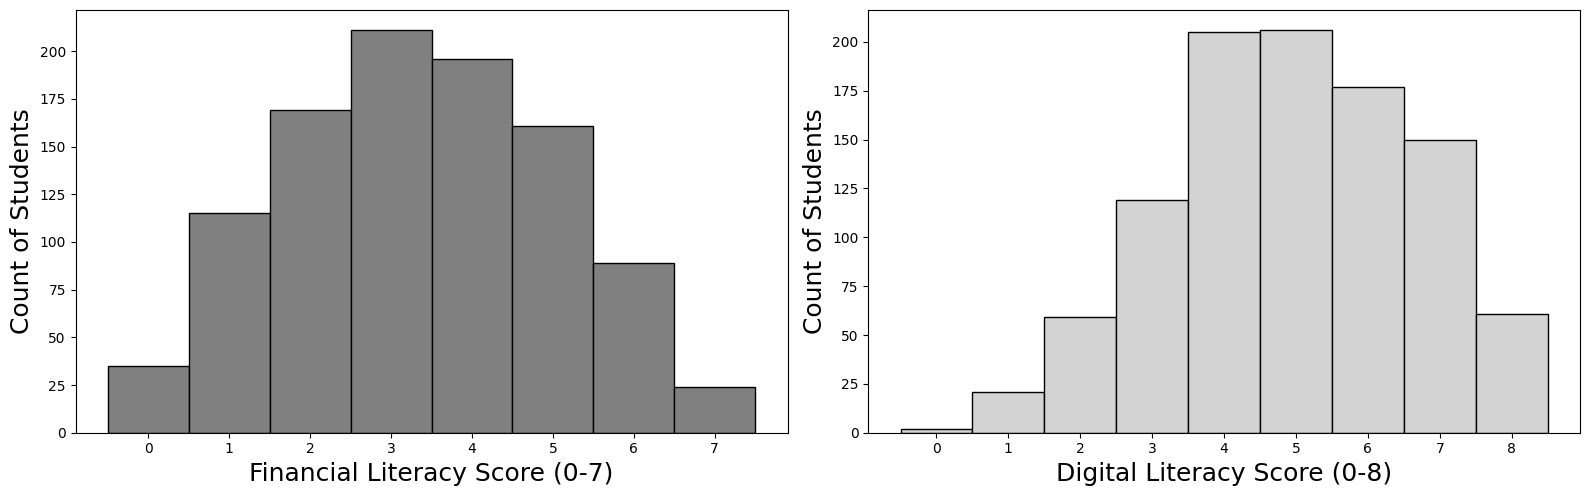

In [32]:
# Create a figure with two subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5.5))

# FL Score
# create bins for each score
bins_financial = np.arange(dataset['Financial_Literacy_Score'].min(), dataset['Financial_Literacy_Score'].max() + 2)
print(bins_financial)
ax1.hist(dataset['Financial_Literacy_Score'], 
            bins=bins_financial, # use the bins defines above
            align='left', 
            color='grey', # set the colour to grey
            edgecolor='black') # add black borders to the bars

ax1.set_xlabel('Financial Literacy Score (0-7)', fontsize=18) # set the x label and make it bigger
ax1.set_ylabel('Count of Students', fontsize=18) # set the y lable and make it bigger
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7]) # set the x values

# DL Score 
# create bins for each score
bins_digital = np.arange(dataset['Digital_Literacy_Score'].min(), dataset['Digital_Literacy_Score'].max() + 2)
print(bins_digital)
ax2.hist(dataset['Digital_Literacy_Score'],  # create the histogram
            bins=bins_digital,  # use the bins defined above
            align='left',
            color='lightgrey',  # set the colour to light grey
            edgecolor='black') # add black borders to the bars

ax2.set_xlabel('Digital Literacy Score (0-8)', fontsize=18) # set the x label and size 18
ax2.set_ylabel('Count of Students', fontsize=18) # set the y label and size 18
# set the x values
ax2.set_xticks(range(int(dataset['Digital_Literacy_Score'].min()), int(dataset['Digital_Literacy_Score'].max()) + 1))


fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('../figures/score_histograms.png')
plt.show()

### Running Anovas and creating the box plots

In [33]:
plot_df = pd.DataFrame({ # create a dataset for the plotting that contains score, field and time
        'Field_of_study': raw_dataset['Field_of_study'],
        'Time_investing': raw_dataset['Time_investing'],
        'Financial_Literacy_Score': dataset['Financial_Literacy_Score']
    })

ANOVA Test Results
F-Statistic: 300.3135
P-Value: 0.0000
ANOVA Test Results
F-Statistic: 7.6233
P-Value: 0.0000


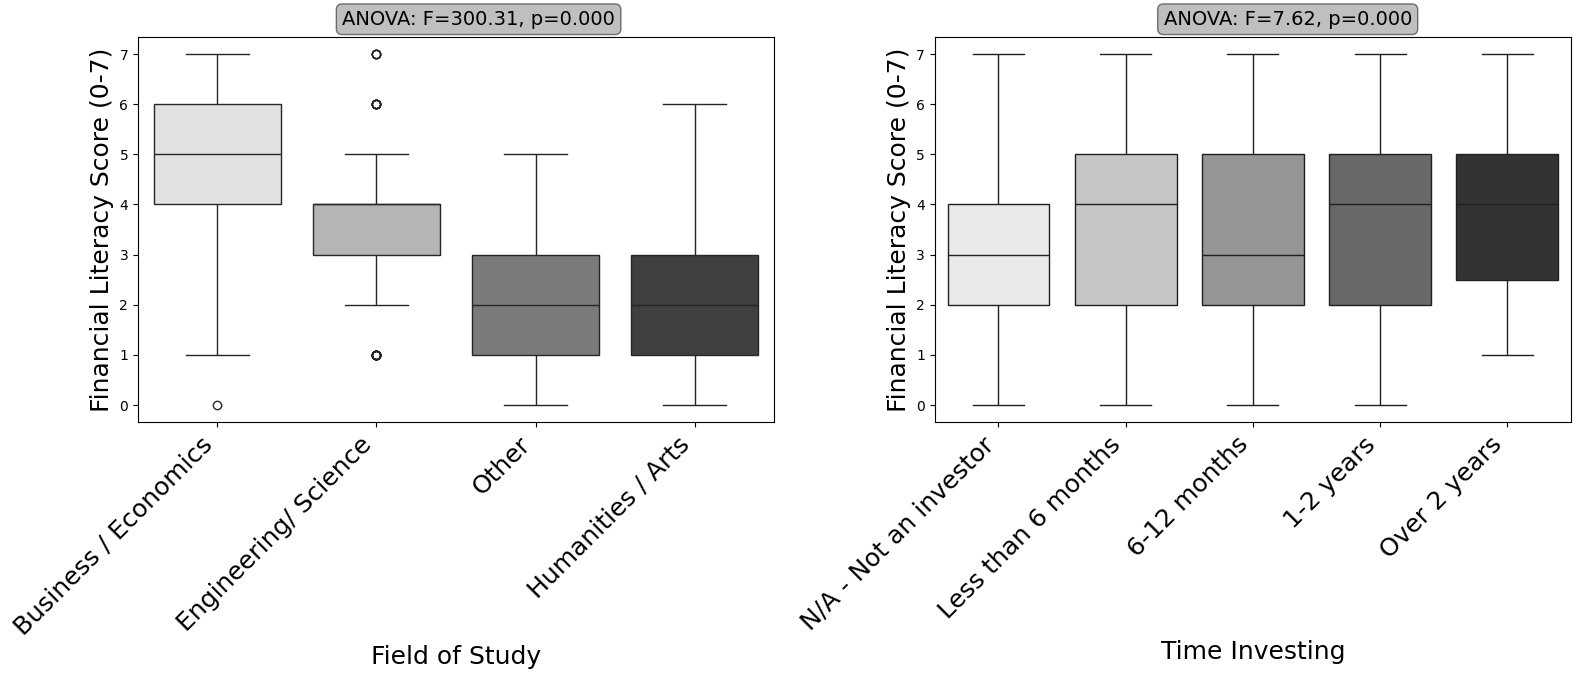

In [34]:
# Define the order for investment time
time_order = [
    'N/A - Not an investor',
    'Less than 6 months',
    '6-12 months',
    '1-2 years',
    'Over 2 years'
]

# Create a figure and a set of subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

#  Score by Field of Study

# Create the boxplot
sns.boxplot(x='Field_of_study', y='Financial_Literacy_Score', data=plot_df, 
            palette='Greys', ax=ax[0]) # add the plot to the left and greys

# Set plot titles and labels
ax[0].set_xlabel('Field of Study', fontsize=18) # set x label and size 18
ax[0].set_ylabel('Financial Literacy Score (0-7)', fontsize=18) # set y label to size 18
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize = 18) # rotate x labels and size 18

# Set up ANOVA - get lists of fin scores for each investment experience
fields = plot_df['Field_of_study'].unique() # get all unique fields of study
score_groups_1 = []
for field in fields: # loop through fields
    # get the scores related to field of study
    scores = plot_df['Financial_Literacy_Score'][plot_df['Field_of_study'] == field].dropna()
    score_groups_1.append(scores) # add scores above 0 to the list

# Run the ANOVA
f_stat_1, p_value_1 = f_oneway(*score_groups_1)

# create the results string
anova_text_1 = f"ANOVA: F={f_stat_1:.2f}, p={p_value_1:.3f}"

# print the results
print("ANOVA Test Results") 
print(f"F-Statistic: {f_stat_1:.4f}")
print(f"P-Value: {p_value_1:.4f}")

# Add the text to the plot
ax[0].text(0.75, 1.07, anova_text_1, # add the text and define where the text should be
         transform=ax[0].transAxes, 
         horizontalalignment='right', # add the text to the right
         verticalalignment='top',# add the text to the top
         fontsize=14, # make the text size 14
         bbox=dict(boxstyle='round,pad=0.3', fc='grey', alpha=0.5))  # add a box around the text


#  Score by Time Investing

# Create the boxplot
sns.boxplot(x='Time_investing', y='Financial_Literacy_Score', data=plot_df, # use the plot df created above
            palette='Greys', order=time_order, ax=ax[1])  # create the box plot using greys and in time order

# Set plot titles and labels
ax[1].set_xlabel('Time Investing', fontsize=18) # set the x label and make it size 18
ax[1].set_ylabel('Financial Literacy Score (0-7)', fontsize=18) # set y label and make it 18
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', fontsize = 18) # set x labels to be rotated and larger

# Based off : https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/

# Set up ANOVA - get lists of fin scores for each investment experience
time_investing_groups = plot_df['Time_investing'].unique() # find unique investing groups
score_groups_2 = []
for group in time_investing_groups: # get FL scores for each time
    scores = plot_df['Financial_Literacy_Score'][plot_df['Time_investing'] == group].dropna()
    score_groups_2.append(scores) # append the scores to the list as long as > 0

# Run the ANOVA
f_stat_2, p_value_2 = f_oneway(*score_groups_2)

# create the results string
anova_text_2 = f"ANOVA: F={f_stat_2:.2f}, p={p_value_2:.3f}"

# print the results
print("ANOVA Test Results") 
print(f"F-Statistic: {f_stat_2:.4f}")
print(f"P-Value: {p_value_2:.4f}")

# Add the text to the plot axes
ax[1].text(0.75, 1.07, anova_text_2,
         transform=ax[1].transAxes, 
         horizontalalignment='right',# add the text to the right
         verticalalignment='top', # add the text at the top
         fontsize=14, # make it size 14
         bbox=dict(boxstyle='round,pad=0.3', fc='grey', alpha=0.5)) # add a box around the text

# Save 
plt.tight_layout()
plt.savefig('../figures/combined_box_score_analysis_with_anova.png')
plt.show() 

In [ ]:
# Based off - https://www.statology.org/tukey-test-python/

# Perform tukey test on field of study and fin score
tukey_field = pairwise_tukeyhsd(
    endog=plot_df['Financial_Literacy_Score'], 
    groups=plot_df['Field_of_study'], 
    alpha=0.05
)
print(tukey_field)

# Perform tukey test on time investing and fin score
tukey_time = pairwise_tukeyhsd(
    endog=plot_df['Financial_Literacy_Score'], 
    groups=plot_df['Time_investing'], 
    alpha=0.05
)
print(tukey_time)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
Business / Economics Engineering/ Science  -1.3356    0.0 -1.5943 -1.0768   True
Business / Economics    Humanities / Arts  -2.6726    0.0 -2.9319 -2.4133   True
Business / Economics                Other  -2.8084    0.0 -3.1275 -2.4894   True
Engineering/ Science    Humanities / Arts  -1.3371    0.0 -1.6084 -1.0657   True
Engineering/ Science                Other  -1.4729    0.0 -1.8018 -1.1439   True
   Humanities / Arts                Other  -0.1358 0.7133 -0.4652  0.1935  False
--------------------------------------------------------------------------------
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
------------------------

### Creating the regression model

In [ ]:
Y = dataset['Investment_Behaviour_Score'] # Dependent Variable - Investment Behaviour
X_columns = [ # variables to include in the regression analysis
    'Financial_Literacy_Score',
    'Digital_Literacy_Score',
    'Field_of_study_Business / Economics',
    'Time_investing_Over 2 years',
    'Greater_influence_Data and analytics',
    'Confidence_in_terms'] 

X = dataset[X_columns] # create a df with the needed x columns
scaler = StandardScaler() # define the scalar to be applied
X_scaled = scaler.fit_transform(X) # scale the x variables

model = LinearRegression() # create the linear regression model
model.fit(X_scaled, Y) # fit the regression model

r_squared = model.score(X_scaled, Y) # get the r2 from the model
Y_pred = model.predict(X_scaled) # predict Y values

importances = model.coef_ # get the coefficients of the model
feature_importances = pd.Series(importances, index=X_columns) # create a series with feature importances and variables

sorted_coefs = feature_importances.sort_values(ascending=False)  # sort the coefficients

print(f"Predicting Investment Behaviour: {r_squared:.4f}") # print the r2


Predicting Investment Behaviour: 0.4150


### Checking Model Assumptions

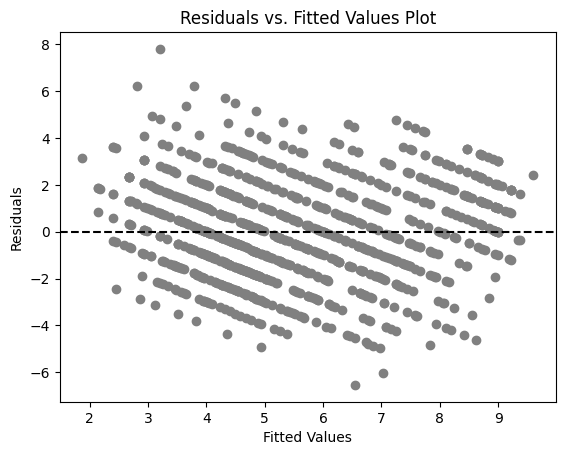

In [37]:
# Checking for residuals
residuals = Y - Y_pred
plt.scatter(Y_pred, residuals, color='grey')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs. Fitted Values Plot")
plt.show()


Almost random scatter shows that the model is a good fit 

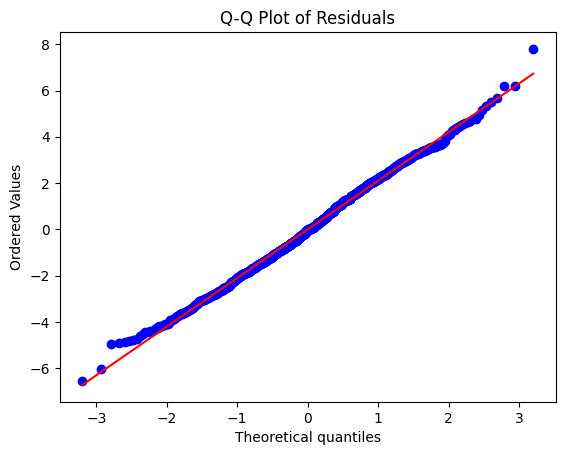

In [38]:
# checking distribution of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

Indicates normal distribution of the residuals

### Creating the correlation and feature importance plots

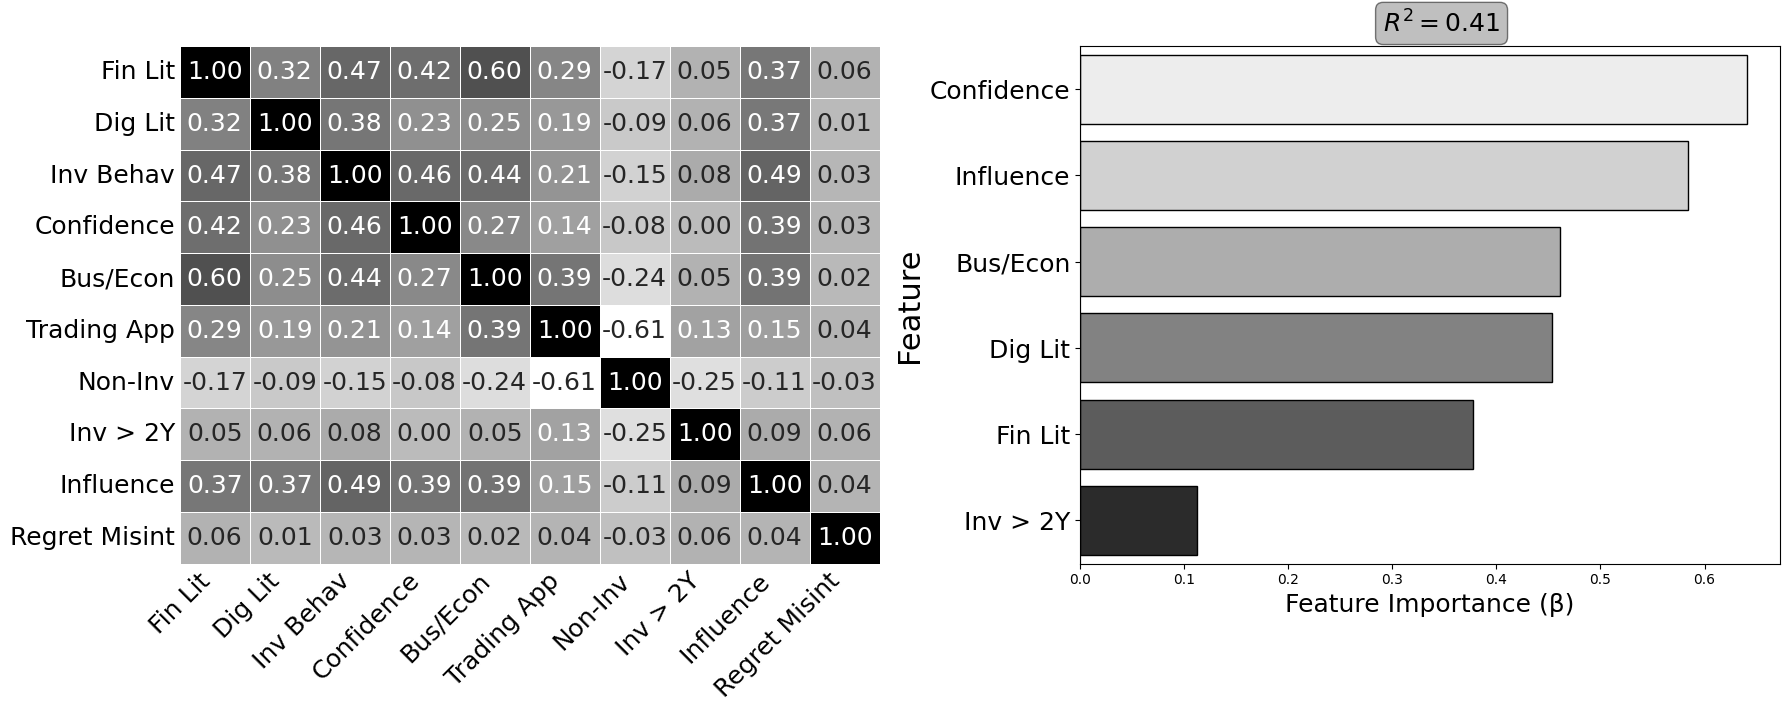

In [ ]:
# Variables to include in correlation matrix
key_variables = [
    # Key Scores
    'Financial_Literacy_Score',
    'Digital_Literacy_Score', 
    'Investment_Behaviour_Score',
    
    # Core Ordinal Variables
    'Confidence_in_terms',           
    
    # Key OHE Categories 
    'Field_of_study_Business / Economics', 
    'Main_platform_type_Trading app', 
    'Time_investing_N/A - Not an investor', 
    'Time_investing_Over 2 years',         
    'Greater_influence_Data and analytics',
    'Regretted_misinterpretation_Yes',
]

# Setup the Figure 
fig, ax = plt.subplots(1, 2, figsize=(18, 7.25)) 

# Correlation Heatmap 

# define shorter y label names
name_mapping = {
    'Financial_Literacy_Score': 'Fin Lit',
    'Digital_Literacy_Score': 'Dig Lit',
    'Investment_Behaviour_Score': 'Inv Behav',
    'Confidence_in_terms': 'Confidence',
    'Field_of_study_Business / Economics': 'Bus/Econ', 
    'Main_platform_type_Trading app': 'Trading App', 
    'Time_investing_N/A - Not an investor': 'Non-Inv', 
    'Time_investing_Over 2 years': 'Inv > 2Y',         
    'Greater_influence_Data and analytics': 'Influence',
    'Regretted_misinterpretation_Yes': 'Regret Misint',
}

# Correlation Matrix

# Create the reduced correlation matrix
reduced_corr_matrix = dataset[key_variables].corr()

# rename columns
reduced_corr_matrix_short = reduced_corr_matrix.rename(columns=name_mapping, index=name_mapping)

# Create the heatmap using the shortend names
sns.heatmap(
    reduced_corr_matrix_short, # use rename variables
    annot=True, # annotate the squares
    fmt='.2f',  # round values to 2 dp
    cmap='Greys',  # set the colour palette to grey
    linewidths=0.5, # set to have narrower dividing lines
    annot_kws={"size": 18}, # make the annotations larger
    ax=ax[0],  # put it on the left
    cbar=False # remove the colour bar on the side
) 

# Customisations
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize=18)  # rotate the x labels and size 14
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0, fontsize=18) # set the y tick labels to be size 14
ax[0].tick_params(axis='y', length=0) # remove tick lines
ax[0].tick_params(axis='x', length=0) # remove any tick lines


# Feature Importance Bar Plot

# Define the shorter y label names
name_mapping_bar = {
    'Financial_Literacy_Score': 'Fin Lit',
    'Digital_Literacy_Score': 'Dig Lit',
    'Field_of_study_Business / Economics': 'Bus/Econ',
    'Time_investing_Over 2 years': 'Inv > 2Y',
    'Greater_influence_Data and analytics': 'Influence',
    'Confidence_in_terms': 'Confidence',
}

#  Feature Importance Plot
sorted_coefs_short_index = sorted_coefs.rename(name_mapping_bar) # rename the indexes

sns.barplot(x=sorted_coefs_short_index.values, # x gives the value of the coefficient
            y=sorted_coefs_short_index.index, # y is the name of the variable
            palette='Greys', # set the colours of the bars to grey
            edgecolor='black', # add black linesa round the bars
            ax=ax[1]) # add it to the right plot
   
# Customisations
ax[1].set_xlabel('Feature Importance (β)', fontsize=18) 
ax[1].set_ylabel('Feature', fontsize=22) 
ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='right', fontsize=18) 
ax[1].axvline(0, color='black', linewidth=0.8) 

# Add the R-squared text to the plot axes 
text = f'$R^{2} = {r_squared:.2f}$' # define text as the r2 rounded to 2sf and in latex form
ax[1].text(0.6, 1.07, text, 
         transform=ax[1].transAxes, 
         horizontalalignment='right', # add the text to the right
         verticalalignment='top', # add the text at the top
         fontsize=18, # make it size 18
         bbox=dict(boxstyle='round,pad=0.3', fc='grey', alpha=0.5)) # add a box around the text

# Save
plt.tight_layout()
plt.savefig('../figures/combined_correlation_and_feature_importance.png')
plt.show()